In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

Exploratory Data Analysis

In [6]:
df = pd.read_csv('DS.csv')
df.head()

,DS_CAST_NO,DS_DS_NO,HM Wt,HM Temp,HM S,Aim S,Act Mg,Act Lime,ADS
0,T92292,2,160.62,1375.0,0.036,0.012,75,349,0.013
1,T92291,1,159.96,1380.0,0.038,0.012,61,263,0.018
2,T92289,1,164.23,1367.0,0.032,0.012,57,276,0.014
3,T92287,1,164.06,1360.0,0.034,0.012,70,278,0.012
4,T92284,2,164.97,NaN,0.065,0.012,99,405,0.010


In [7]:
df.tail()

,DS_CAST_NO,DS_DS_NO,HM Wt,HM Temp,HM S,Aim S,Act Mg,Act Lime,ADS
12289,T72982,1,151.43,NaN,0.035,0.012,51,260,0.011
12290,T72980,1,154.38,NaN,0.030,0.012,42,213,0.010
12291,T72978,1,158.00,NaN,0.039,0.012,57,274,0.014
12292,T72976,1,158.85,NaN,0.039,0.012,58,279,0.016
12293,T72974,1,158.90,NaN,0.032,0.012,51,277,0.015


In [8]:
df.shape

(12294, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DS_CAST_NO  12294 non-null  object 
 1   DS_DS_NO    12294 non-null  int64  
 2   HM Wt       12292 non-null  float64
 3   HM Temp     7672 non-null   float64
 4   HM S        12294 non-null  float64
 5   Aim S       12294 non-null  float64
 6   Act Mg      12294 non-null  int64  
 7   Act Lime    12294 non-null  int64  
 8   ADS         12294 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 864.6+ KB


In [10]:
df.nunique()

DS_CAST_NO    12294
DS_DS_NO          2
HM Wt          2027
HM Temp         244
HM S             77
Aim S             5
Act Mg          125
Act Lime        529
ADS              24
dtype: int64

Here's the explanation in plain text:

DS_CAST_NO: Desulphurization Cast Number – a unique ID for a specific batch of steel undergoing desulphurization. It tracks the hot metal before it enters the LD converter.

DS_DS_NO: Desulphurization Station Number – identifies the specific station or ladle used during the desulphurization process.

HM Wt: Hot Metal Weight (in tons) – the amount of molten iron charged into the converter. Example: 161 tons.

HM Temp: Hot Metal Temperature (in °C) – the temperature of the hot metal before the blowing process begins. Example: 1,375°C.

HM S: Hot Metal Sulfur Content (in %) – the sulfur percentage in the hot metal before desulphurization. Example: 0.036%.

Aim S: Aimed Sulfur Content (in %) – the target sulfur level after desulphurization. Example: 0.012%.

Act Mg: Actual Magnesium Used (in kg) – the amount of magnesium used to remove sulfur. Magnesium reacts with sulfur to form MgS. Example: 75 kg.

Act Lime: Actual Lime Used (in kg) – the amount of lime added to assist in removing impurities like sulfur and phosphorus by forming basic slag. Example: 349 kg.

ADS: After Desulphurization Sulfur (in %) – the actual sulfur content in the hot metal after treatment. Ideally, this should be less than or equal to the Aim S. Example: 0.013%.


In [11]:
df.isnull().sum()

DS_CAST_NO       0
DS_DS_NO         0
HM Wt            2
HM Temp       4622
HM S             0
Aim S            0
Act Mg           0
Act Lime         0
ADS              0
dtype: int64

In [12]:
df['HM Temp'].value_counts()

HM Temp
1359.0    191
1347.0    173
1373.0    165
1364.0    152
1355.0    149
         ... 
1483.0      1
1208.0      1
1254.0      1
1472.0      1
1489.0      1
Name: count, Length: 244, dtype: int64

In [13]:
# Hot metal temperature mean
mean = df['HM Temp'].mean()
mean

np.float64(1355.0243743482795)

In [14]:
mean = df['HM Temp'].mean()
df['HM Temp'] = df['HM Temp'].fillna(mean)

In [15]:
df.isnull().sum()

DS_CAST_NO    0
DS_DS_NO      0
HM Wt         2
HM Temp       0
HM S          0
Aim S         0
Act Mg        0
Act Lime      0
ADS           0
dtype: int64

In [16]:
# removing HM Wt missing values
df = df.dropna(subset=['HM Wt'])


In [17]:
df.isnull().sum()

DS_CAST_NO    0
DS_DS_NO      0
HM Wt         0
HM Temp       0
HM S          0
Aim S         0
Act Mg        0
Act Lime      0
ADS           0
dtype: int64

All the null values have been removed

In [18]:
# Remove DS_CAST_NO and DS_DS_NO
df.drop(columns=['DS_CAST_NO' , 'DS_DS_NO'],inplace=True)
df.head()

,HM Wt,HM Temp,HM S,Aim S,Act Mg,Act Lime,ADS
0,160.62,1375.000000,0.036,0.012,75,349,0.013
1,159.96,1380.000000,0.038,0.012,61,263,0.018
2,164.23,1367.000000,0.032,0.012,57,276,0.014
3,164.06,1360.000000,0.034,0.012,70,278,0.012
4,164.97,1355.024374,0.065,0.012,99,405,0.010


Univariate analysis

Summary Statistics:

              HM Wt       HM Temp          HM S        Act Mg      Act Lime
count  12292.000000  12292.000000  12292.000000  12292.000000  12292.000000
mean     159.528205   1355.024374      0.031028     57.603401    282.362187
std       11.693164     26.164246      0.010020     14.549799     77.687919
min       32.890000   1177.000000      0.013000     10.000000     76.000000
25%      152.910000   1349.000000      0.024000     48.000000    236.000000
50%      158.730000   1355.024374      0.029000     56.000000    270.000000
75%      165.620000   1364.000000      0.036000     65.000000    315.000000
max      197.860000   1630.000000      0.092000    167.000000   1207.000000


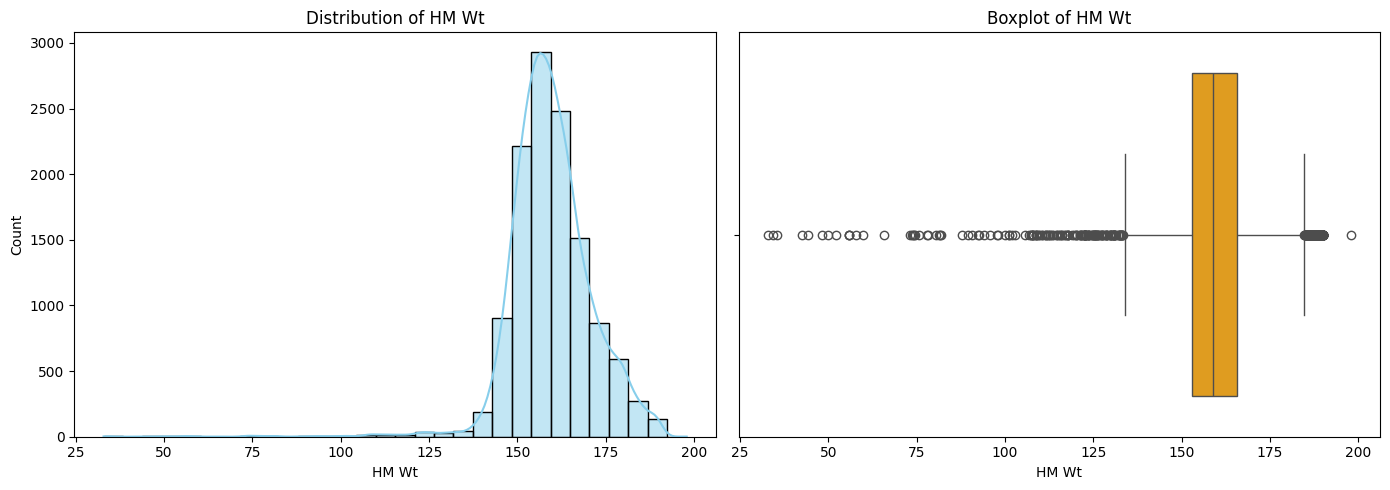

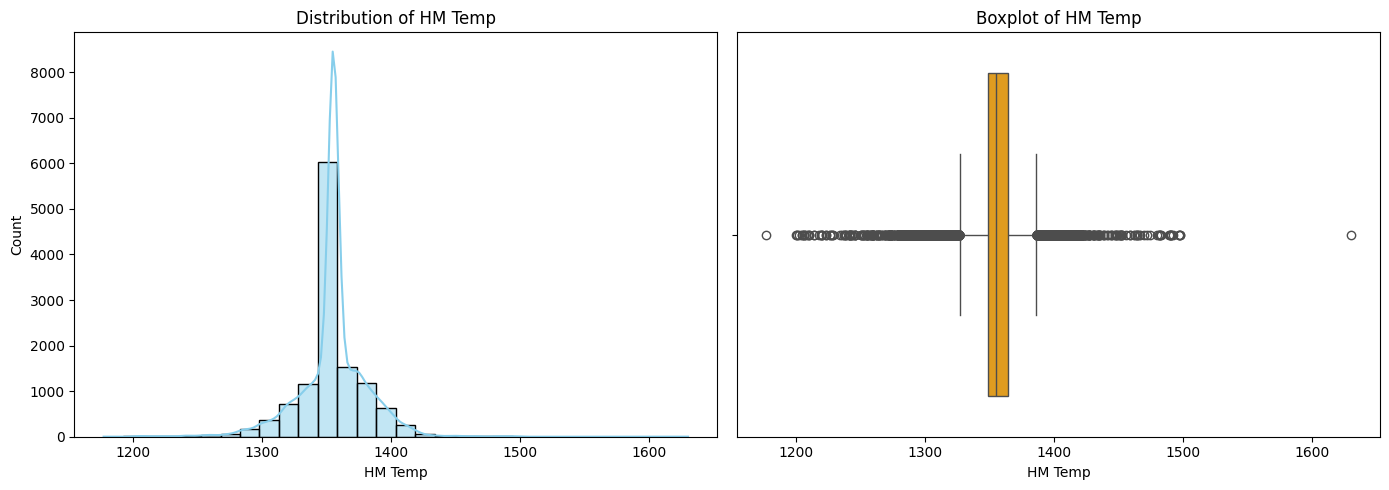

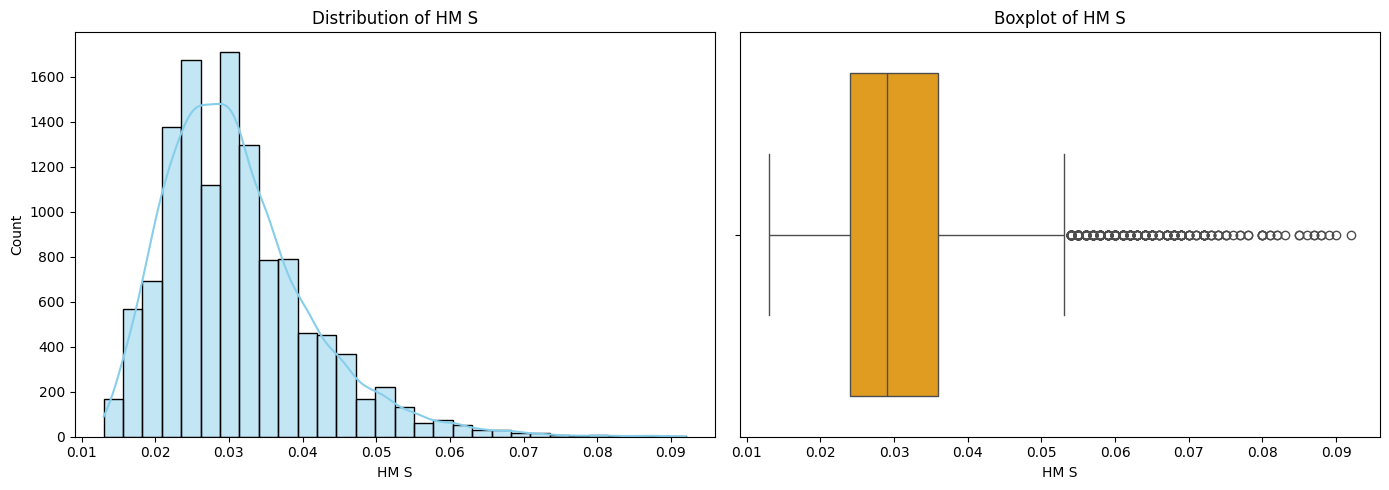

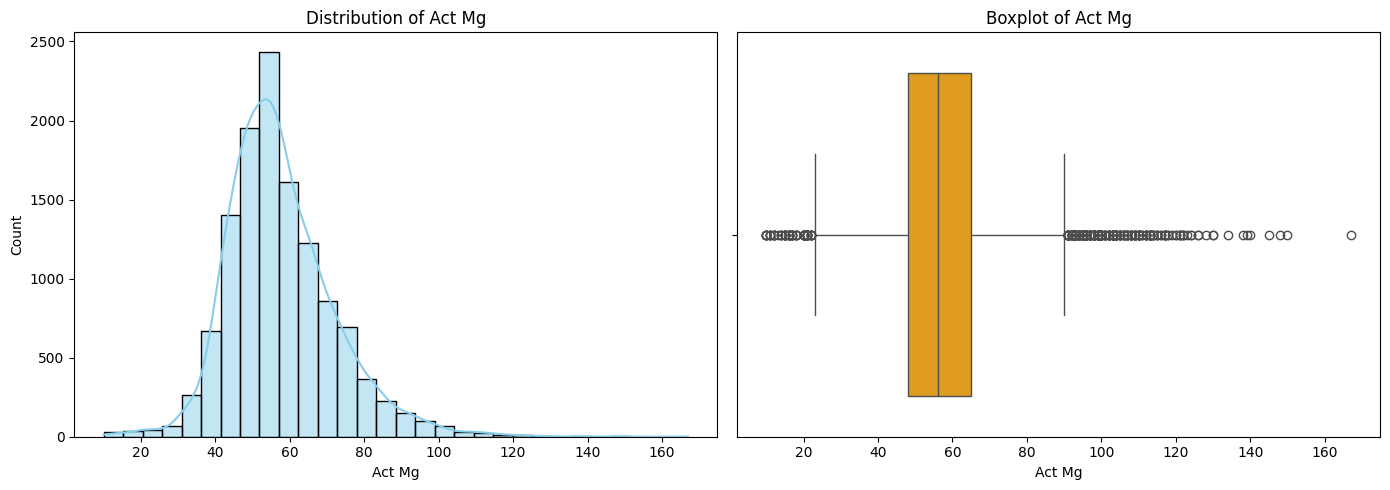

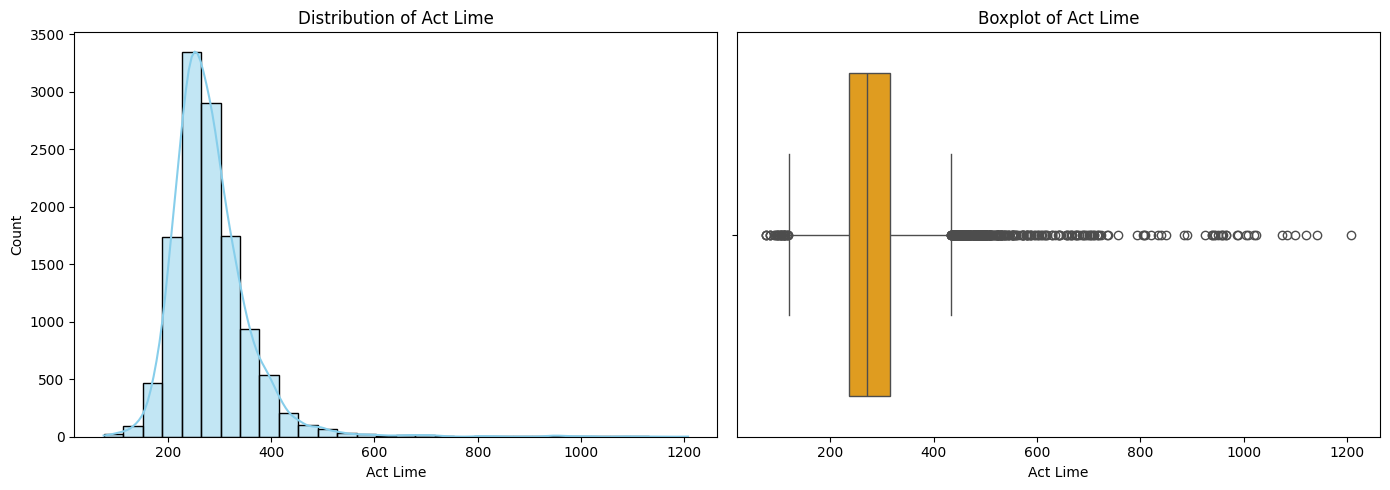

In [19]:
univariate_features= ['HM Wt', 'HM Temp', 'HM S', 'Act Mg', 'Act Lime']
print("Summary Statistics:\n")
print(df[univariate_features].describe())

# Plotting
for col in univariate_features:
    plt.figure(figsize=(14, 5))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

Bivariate Analysis

In [20]:
bivariate_features = ['HM Wt', 'HM Temp', 'HM S', 'Act Mg', 'Act Lime', 'ADS']
correlation_matrix = df[bivariate_features].corr()

# Show correlation of each feature with ADS
print(correlation_matrix['ADS'].sort_values(ascending=False))


ADS         1.000000
HM S        0.252521
HM Temp     0.097388
Act Lime    0.003101
Act Mg     -0.050134
HM Wt      -0.066724
Name: ADS, dtype: float64




HM S : Moderate positive correlation  more sulfur in hot metal , higher final sulfur. This makes sense chemically.
HM Temp : Very weak positive correlation  higher temperature may slightly raise ADS, but not significant.
Act Lime : 	Almost zero  lime has no strong linear effect on ADS in your data. 
Act Mg : Weak negative correlation  more magnesium slightly reduces sulfur, which is expected (Mg + S - MgS).
HM Wt : 	Weak negative  heavier metal may be better buffered, but effect is minimal.

Heatmap analysis

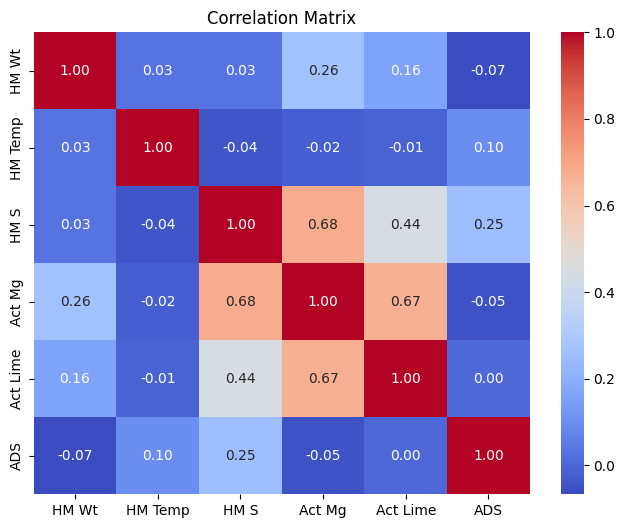

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Scatter plot

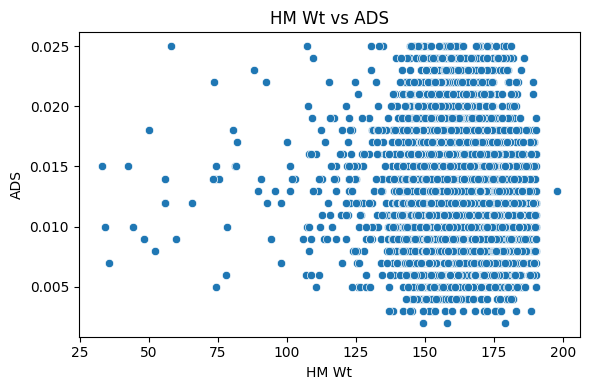

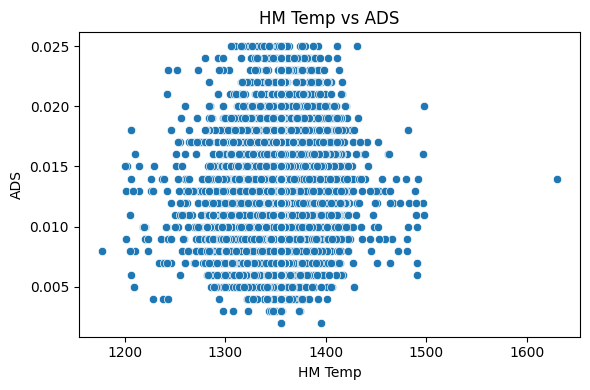

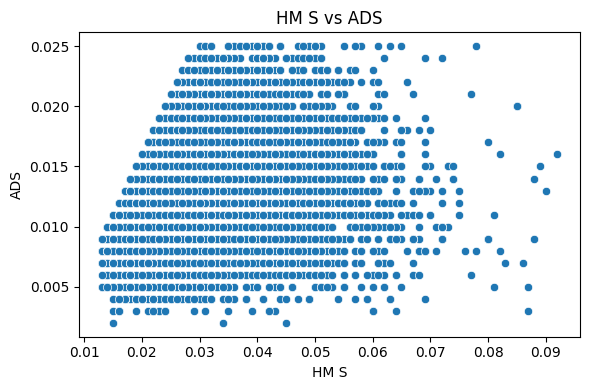

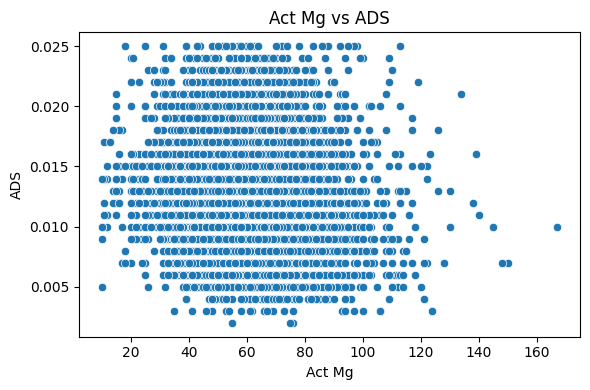

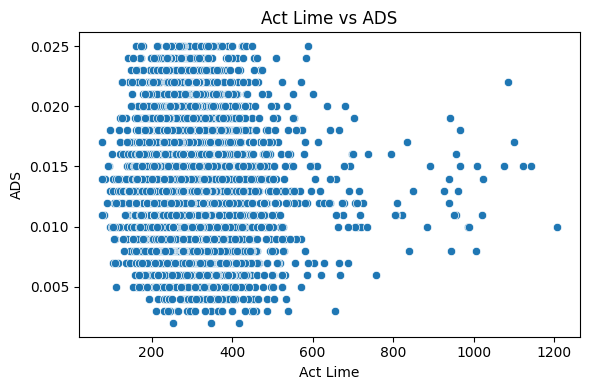

In [22]:
for col in bivariate_features[:-1]:  # exclude ADS itself
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['ADS'])
    plt.title(f'{col} vs ADS')
    plt.xlabel(col)
    plt.ylabel('ADS')
    plt.tight_layout()
    plt.show()


Final Model Training

In [23]:
X = df[['HM Wt', 'HM Temp', 'HM S', 'Act Mg', 'Act Lime']]
y = df['ADS']


# Step 2: Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR()
}

# Step 4: Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    # Binary Success Evaluation: Predicted ADS <= 0.012
    pred_success = (preds <= 0.012).astype(int)
    true_success = (y_test <= 0.012).astype(int)
    success_acc = accuracy_score(true_success, pred_success)
    
    results.append({
        'Model': name,
        'MSE': mse,
        'R² Score': r2,
        'Success Accuracy (ADS <= 0.012)': success_acc
    })

# Step 5: Results DataFrame
results_df = pd.DataFrame(results).sort_values(by='Success Accuracy (ADS <= 0.012)', ascending=False)
print(results_df)



              Model       MSE  R² Score  Success Accuracy (ADS <= 0.012)
3      RandomForest  0.000012  0.233782                         0.678731
4  GradientBoosting  0.000011  0.283439                         0.676291
0  LinearRegression  0.000013  0.190279                         0.668158
1             Ridge  0.000014  0.110994                         0.599024
2             Lasso  0.000016 -0.000008                         0.472956
5               SVR  0.000017 -0.059263                         0.472956


Gradient boosting performs best

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [25]:
importances = grid.best_estimator_.feature_importances_
for feat, score in zip(X.columns, importances):
    print(f"{feat}: {score:.4f}")


HM Wt: 0.1131
HM Temp: 0.1289
HM S: 0.3904
Act Mg: 0.2473
Act Lime: 0.1202


Feature singnificance order
HM S > Act Mg > HM Temp > Act Lime > HM Wt

In [26]:
# Feature impotance bar plot

C:\Users\HP\AppData\Local\Temp\ipykernel_27616\402609939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X.columns, palette="viridis")


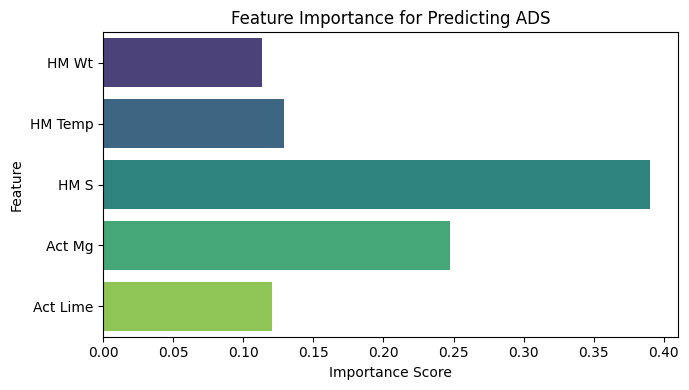

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance barplot
plt.figure(figsize=(7, 4))
sns.barplot(x=importances, y=X.columns, palette="viridis")
plt.title("Feature Importance for Predicting ADS")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [28]:
best_model = grid.best_estimator_
best_model

,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Saving the final model

In [43]:
import pickle
best_model = grid.best_estimator_

with open("final_model.pkl", "wb") as file:
    pickle.dump(best_model, file)
print("Model saved as 'final_model.pkl'")


Model saved as 'final_model.pkl'


Loading Model and Testing

In [29]:
import pickle

with open("final_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)


In [30]:
loaded_model


,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
# Predict for first 5 samples
sample_input = X_test.head(5)
predictions = loaded_model.predict(sample_input)

# Show predictions with actual ADS values
for i, (pred, actual) in enumerate(zip(predictions, y_test.head(5))):
    print(f"Sample {i+1}: Predicted ADS = {pred:.5f}, Actual ADS = {actual:.5f}")


Sample 1: Predicted ADS = 0.01341, Actual ADS = 0.01500
Sample 2: Predicted ADS = 0.01181, Actual ADS = 0.01200
Sample 3: Predicted ADS = 0.01417, Actual ADS = 0.02000
Sample 4: Predicted ADS = 0.01325, Actual ADS = 0.01500
Sample 5: Predicted ADS = 0.01181, Actual ADS = 0.01200


In [32]:
aim_s = 0.012
print("\nSamples meeting Aim S (≤ 0.012):")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: {'✅' if pred <= aim_s else '❌'}")



Samples meeting Aim S (≤ 0.012):
Sample 1: ❌
Sample 2: ✅
Sample 3: ❌
Sample 4: ❌
Sample 5: ✅
